In [1]:
import pandas as pd
import numpy as np
import math as math

In [2]:
ob = pd.read_csv("https://data.wprdc.org/dataset/b049da40-910a-4b9d-9438-ff584e432bb1/resource/fce248f0-8697-4d2a-bbe0-2da826776bfa/download/obesity-ac-2006-2010censustracts.csv", )
ob.columns = [c.replace(' ', '_') for c in ob.columns]

In [3]:
ob

,stname,tractfips,2000_Tract,2010_Tract,MUNICIPALITY,Municipality,City_Neighborhood,2006-2010_estimate_of_obesity
0,Pennsylvania,42003010300,10300,NaN,PITTSBURGH,Pittsburgh,Bluff,0.246936
1,Pennsylvania,42003020100,20100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
2,Pennsylvania,42003020300,20300,NaN,PITTSBURGH,Pittsburgh,Strip District,0.369996
3,Pennsylvania,42003030500,30500,NaN,PITTSBURGH,Pittsburgh,Crawford Roberts,0.488691
4,Pennsylvania,42003040200,40200,NaN,PITTSBURGH,Pittsburgh,West oakland,0.366391
...,...,...,...,...,...,...,...,...
411,Pennsylvania,42003980600,210800,980600,PITTSBURGH,Pittsburgh,Chateau,0.439386
412,Pennsylvania,42003980700,192100,980700,PITTSBURGH,Pittsburgh,South Shore,0.354375
413,Pennsylvania,42003981200,220500,563200 & 981200,PITTSBURGH,Pittsburgh,North Shore,0.121487
414,Pennsylvania,42003981800,120300,NaN,PITTSBURGH,Pittsburgh,Lincoln-Lemington-Belmar,0.574293


In [4]:
neigh = ob['City_Neighborhood'].unique()
print(neigh)

['Bluff' 'Central Business District' 'Strip District' 'Crawford Roberts'
 'West oakland' 'North oakland' 'Central Oakland' 'South Oakland'
 'Middle Hill' 'Upper Hill' 'Bedford Dwellings' 'Terrace Village'
 'Lower Lawrenceville' 'Polish Hill' 'Shadyside' 'Bloomfield' 'Friendship'
 'Central Lawrenceville' 'Stanton Heights' 'Upper Lawrenceville'
 'Morningside' 'Garfield' 'Highland Park' 'East Liberty' 'Larimer'
 'Homewood West' 'Homewood North' 'Homewood South' 'East Hills'
 'Squirrel Hill North' 'Point Breeze' 'Point Breeze North'
 'Squirrel Hill South' 'Regent Square' 'Swisshelm Park' 'Hazelwood'
 'Greenfield' 'Southside Slopes' 'Southside Flats' 'Allentown'
 'Mount Washington' 'Duquesne Heights' 'Beechview' 'Brookline' 'Sheraden'
 'Banksville' 'Manchester' 'Central Northside' "Troy Hill/Herr's Island"
 'Spring Garden' 'California Kirkbride' 'Fineview' 'Perry North'
 'Northview Heights' 'Summer Hill' 'Perry South' 'Spring Hill-Cityview'
 'Brighton Heights' 'Marshall-Shadeland' 'Crafton 

In [5]:
ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   stname                         416 non-null    object 
 1   tractfips                      416 non-null    int64  
 2   2000_Tract                     416 non-null    int64  
 3   2010_Tract                     57 non-null     object 
 4   MUNICIPALITY                   416 non-null    object 
 5   Municipality                   416 non-null    object 
 6   City_Neighborhood              140 non-null    object 
 7   2006-2010_estimate_of_obesity  416 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 26.1+ KB


In [6]:
order = ob.City_Neighborhood.to_numpy
print(order)


<bound method IndexOpsMixin.to_numpy of 0                          Bluff
1      Central Business District
2                 Strip District
3               Crawford Roberts
4                   West oakland
                 ...            
411                      Chateau
412                  South Shore
413                  North Shore
414     Lincoln-Lemington-Belmar
415                North Oakland
Name: City_Neighborhood, Length: 416, dtype: object>


In [7]:
ob = ob.sort_values(by=['2006-2010_estimate_of_obesity']).dropna()
ob.loc[:, '2006-2010_estimate_of_obesity'] = ob['2006-2010_estimate_of_obesity'] * 100
ob

,stname,tractfips,2000_Tract,2010_Tract,MUNICIPALITY,Municipality,City_Neighborhood,2006-2010_estimate_of_obesity
369,Pennsylvania,42003562000,40300,562000 & 982200,PITTSBURGH,Pittsburgh,North Oakland,7.035281
413,Pennsylvania,42003981200,220500,563200 & 981200,PITTSBURGH,Pittsburgh,North Shore,12.148674
415,Pennsylvania,42003982200,50700,562000 & 982200,PITTSBURGH,Pittsburgh,North Oakland,13.880555
378,Pennsylvania,42003562700,220100,562700,PITTSBURGH,Pittsburgh,Allegheny West,20.639897
387,Pennsylvania,42003563100,281100,563100,PITTSBURGH,Pittsburgh,Westwood,26.810591
381,Pennsylvania,42003562800,281200,562800,PITTSBURGH,Pittsburgh,Oakwood,26.857921
386,Pennsylvania,42003563100,201600,563100,PITTSBURGH,Pittsburgh,Ridgemont,27.678553
376,Pennsylvania,42003562600,201900,562600,PITTSBURGH,Pittsburgh,West End,28.790369
372,Pennsylvania,42003562400,180600,562400,PITTSBURGH,Pittsburgh,Bon Air,28.950467
382,Pennsylvania,42003562900,310100,562900,PITTSBURGH,Pittsburgh,Hays,30.653910


Text(0, 0.5, 'Percentage of Obese People')

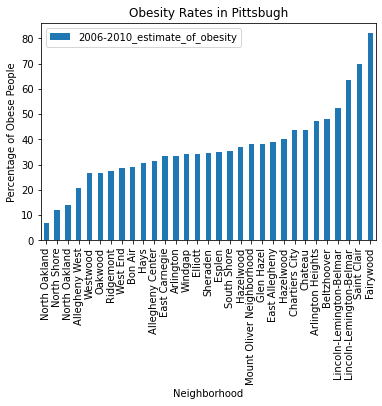

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
ob.plot(x = 'City_Neighborhood', y = '2006-2010_estimate_of_obesity', kind = 'bar')
plt.title("Obesity Rates in Pittsbugh")
plt.xlabel("Neighborhood")
plt.ylabel("Percentage of Obese People")